# Lab 9 - Support Vector Machines

In [58]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
# tool
def plot_svc(svc, X, y, pad=0.50, step=0.02):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx,yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    
    # make prediction
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=(5,5))
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    # Support vectors
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [3]:
np.random.seed(1)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] + 1

## Support Vector Classifier

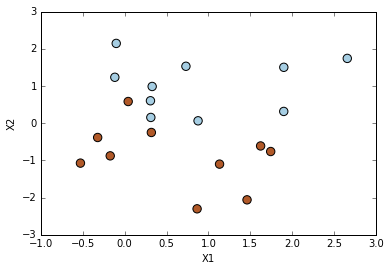

In [4]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [5]:
np.arange(1.5,5,50)

array([1.5])

In [6]:
# fit svm
svc_model = SVC(C=10,kernel='linear',)
svc_model.fit(X,y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

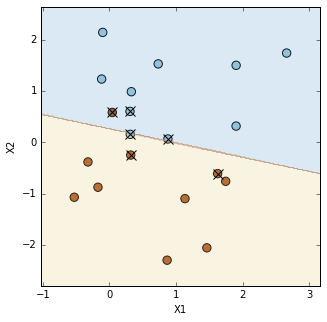

Number of support vectors:  6


In [7]:
plot_svc(svc_model, X, y)

In [8]:
svc_model.support_

array([13, 15, 16,  0,  4,  9], dtype=int32)

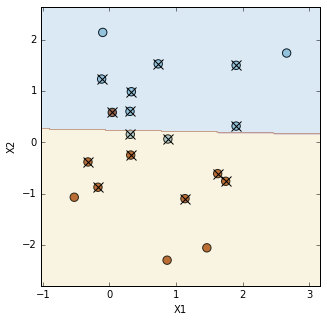

Number of support vectors:  15


In [9]:
svc_model2 = SVC(C=0.1, kernel='linear')
svc_model2.fit(X, y)
plot_svc(svc_model2, X, y)

In [10]:
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'),tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [11]:
clf.grid_scores_

[mean: 0.95000, std: 0.15000, params: {'C': 0.001},
 mean: 0.95000, std: 0.15000, params: {'C': 0.01},
 mean: 0.85000, std: 0.22913, params: {'C': 0.1},
 mean: 0.90000, std: 0.20000, params: {'C': 1},
 mean: 0.90000, std: 0.20000, params: {'C': 5},
 mean: 0.90000, std: 0.20000, params: {'C': 10},
 mean: 0.90000, std: 0.20000, params: {'C': 100}]

In [12]:
clf.best_params_['C']

0.001

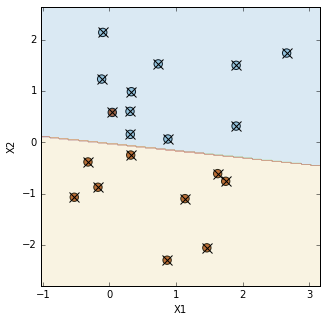

Number of support vectors:  20


In [13]:
svc_model2 = SVC(C=clf.best_params_['C'], kernel='linear')
svc_model2.fit(X, y)
plot_svc(svc_model2, X, y)

In [14]:
y_pred = svc_model2.predict(X)
pd.DataFrame(confusion_matrix(y, y_pred), index=svc_model2.classes_, columns=svc_model2.classes_)

,-1,1
-1,10,0
1,1,9


## Support Vector Machine

In [15]:
np.random.seed(1)
X = np.random.randn(200,2)
X[1:100,:] = X[1:100,:] + 2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

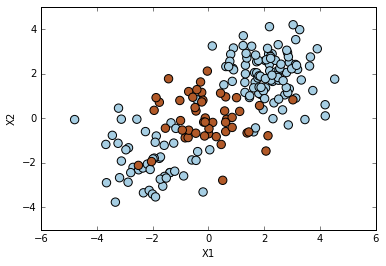

In [16]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

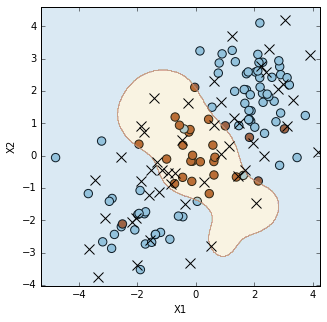

Number of support vectors:  51


In [18]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

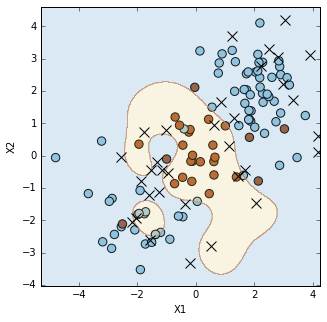

Number of support vectors:  34


In [19]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

In [20]:
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'),tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100], 'gamma': [0.5, 1, 2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [21]:
clf.best_params_

{'C': 100, 'gamma': 0.5}

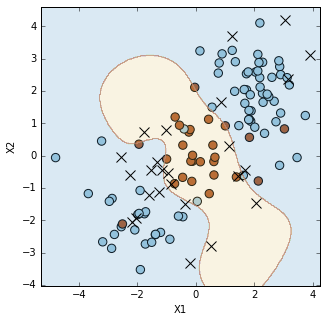

Number of support vectors:  26


In [22]:
svm2 = SVC(C=100, kernel='rbf', gamma=0.5)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

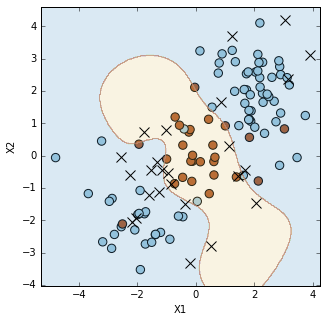

Number of support vectors:  26
[[71  2]
 [ 7 20]]
0.91


In [24]:
plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))

## ROC Curves

In [25]:
from sklearn.metrics import auc, roc_curve

In [45]:
# More constrained model
svm3 = SVC(C=1, kernel='rbf', gamma=0.1)
svm3.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=10)
svm4.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
# distance from points to hyperplane
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

In [51]:
# compute metrics: for an ROC, we need the TP and the FP
FP_rate3, TP_rate3, _ = roc_curve(y_train,y_train_score3)
roc_auc3 = auc(FP_rate3, TP_rate3)

FP_rate4, TP_rate4, _ = roc_curve(y_train,y_train_score4)
roc_auc4 = auc(FP_rate4, TP_rate4)

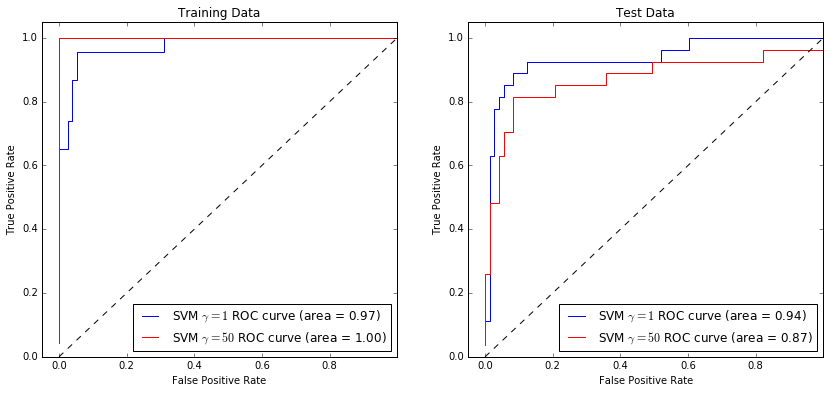

In [52]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(FP_rate3, TP_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(FP_rate4, TP_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

FP_rate3, TP_rate3, _ = roc_curve(y_test,y_test_score3)
roc_auc3 = auc(FP_rate3, TP_rate3)

FP_rate4, TP_rate4, _ = roc_curve(y_test,y_test_score4)
roc_auc4 = auc(FP_rate4, TP_rate4)

ax2.plot(FP_rate3, TP_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(FP_rate4, TP_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

## SVM with multiple classes

In [62]:
np.random.seed(1)
XX = np.vstack([X,np.random.randn(50,2)])
yy = np.hstack([y,np.repeat(0,50)])
XX[yy==0,1] = XX[yy==0,1]+4

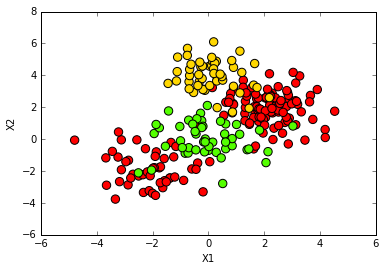

In [63]:
plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=mpl.cm.prism)
plt.xlabel('X1')
plt.ylabel('X2');

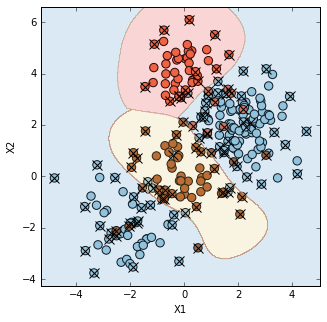

Number of support vectors:  103


In [64]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)
plot_svc(svm5, XX, yy)

## Application to Gene Expression Data

In [103]:
X_train = pd.read_csv('./datasets/Khan_xtrain.csv').drop(['Unnamed: 0'],axis=1)
X_test = pd.read_csv('./datasets/Khan_xtest.csv').drop(['Unnamed: 0'],axis=1)
y_train = pd.read_csv('./datasets/Khan_ytrain.csv').drop(['Unnamed: 0'],axis=1).values.ravel()
y_test = pd.read_csv('./datasets/Khan_ytest.csv').drop(['Unnamed: 0'],axis=1).values.ravel()

In [104]:
X_train.shape

(63, 2308)

In [105]:
X_test.shape

(20, 2308)

In [106]:
y_train.shape

(63,)

In [107]:
y_test.shape

(20,)

In [110]:
pd.Series(y_train).value_counts()

2    23
4    20
3    12
1     8
dtype: int64

In [111]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [116]:
# confusion matrix
cm = confusion_matrix(y_train, svc.predict(X_train))
cm = pd.DataFrame(cm.T, index = svc.classes_,columns = svc.classes_)
cm

,1,2,3,4
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [118]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm = pd.DataFrame(cm.T, index = svc.classes_,columns = svc.classes_)
cm

,1,2,3,4
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
